# King County Housing Analysis


### Import Libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

#custom functions file
from Functions import *

#pandas and numpy
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib qt

#sklearn
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#stats and scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
import scipy.stats as stats

#optional code to display all values as floats to 4 decimals
#pd.options.display.float_format = '{:,.4f}'.format

### Import Cleaned Dataframes

In [2]:
data = pd.read_csv(r'C:\Users\Nick\Documents\Flatiron Project 2\dsc-phase-2-project-online-master\dsc-phase-2-project-online-master\data\kc_house_data.csv')
data_ = pd.read_csv(r'C:\Users\Nick\Documents\Flatiron Project 2\dsc-phase-2-project-online-master\dsc-phase-2-project-online-master\data\cleaned_data_features.csv')
data_z = pd.read_csv(r'C:\Users\Nick\Documents\Flatiron Project 2\dsc-phase-2-project-online-master\dsc-phase-2-project-online-master\data\z_score_data.csv')
data_log = pd.read_csv(r'C:\Users\Nick\Documents\Flatiron Project 2\dsc-phase-2-project-online-master\dsc-phase-2-project-online-master\data\log_transform_data.csv')

### Correlation Matrix 

In [3]:
# builds a correlation matrix for the z-score columns
correlation = data_z.corr()

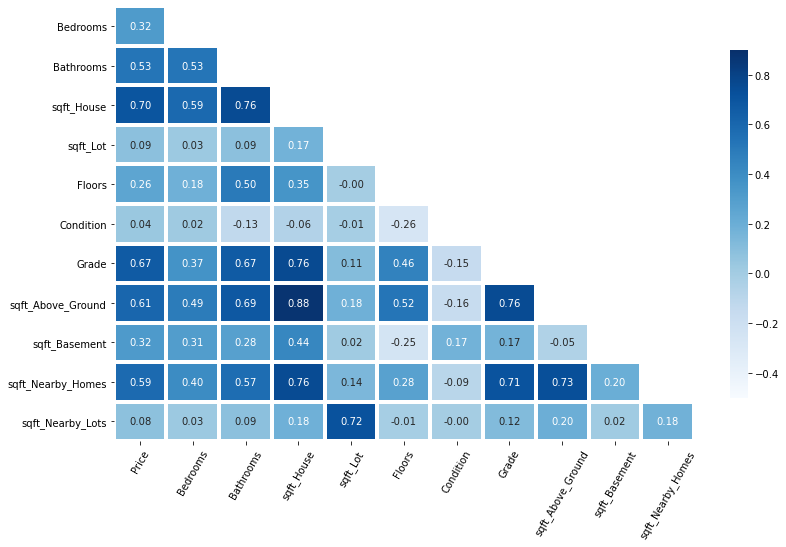

In [4]:
# creates the figure and axis for the subplots
fig, ax = plt.subplots(figsize=(13, 8))

# creates a mask to remove the mirrored half of heatmap
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# adjusts mask and dataframe
mask_adj = mask[1:, :-1]
correlation_adj = correlation.iloc[1:,:-1].copy()

# plots heatmap
sns.heatmap(correlation_adj, mask=mask_adj, annot=True, fmt='.2f', cmap='Blues', linewidths=3, vmin=-0.5, vmax=0.9, cbar_kws={"shrink": .8})

# ytick adjustment
plt.xticks(rotation=60)
plt.show()

In [5]:
# displays 90th percentile correlation values
corr_matrix_90 = correlation.describe(percentiles=[0.9])
corr_matrix_90['Price']

count    12.000000
mean      0.432650
std       0.296210
min       0.036031
50%       0.424855
90%       0.698532
max       1.000000
Name: Price, dtype: float64

###  Create Training & Testing Sets

In [6]:
# create target and features
target = data_z['Price']
features = data_z.drop(columns=['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3, random_state=333)

In [7]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(15117, 11) (15117,)
(6479, 11) (6479,)


In [8]:
# instantiate a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# predict a linear model for both target and test sets
target_train = linear_reg_model.predict(X_train)
target_test = linear_reg_model.predict(X_test)

# calculate MSE scores for both train/test
train_mse = mean_squared_error(y_train, target_train)
test_mse = mean_squared_error(y_test, target_test)
print('Training Set Mean Squared Error:', round(train_mse, 4))
print('Test Set Mean Squared Error:', round(test_mse, 4))

Training Set Mean Squared Error: 0.4454
Test Set Mean Squared Error: 0.4138


In [9]:
# Compute and print r^2 and RMSE
print("r-squared: {}".format(round(linear_reg_model.score(X_test, y_test), 4)))
rmse = np.sqrt(mean_squared_error(y_test, target_test))
print("RMSE: {}".format(round(rmse, 4)))

r-squared: 0.5642
RMSE: 0.6432


In [10]:
# Perform 3-fold cross validation
cvscores_3 = cross_val_score(linear_reg_model, features, target, cv=3)
print("3-fold cross validation: {}".format(round(np.mean(cvscores_3),4)))

# perform 5-fold cross validation
cvscores_5 = cross_val_score(linear_reg_model, features, target, cv=5)
print("5-fold cross validation: {}".format(round(np.mean(cvscores_5), 4)))

# perform 10-fold cross validation
cvscores_10 = cross_val_score(linear_reg_model, features, target, cv=10)
print("10-fold cross validation: {}".format(round(np.mean(cvscores_10), 4)))

3-fold cross validation: 0.5621
5-fold cross validation: 0.5611
10-fold cross validation: 0.5595


### Initial OLS Regression Model

In [11]:
# creating an OLS regression model
_target = 'Price'
_features = ['Bedrooms','Bathrooms','sqft_House','sqft_Lot','Floors','Condition','Grade','sqft_Above_Ground','sqft_Basement','sqft_Nearby_Homes','sqft_Nearby_Lots']

predictors = '+'.join(_features)
formula = _target + '~' + predictors
model = ols(formula=formula, data=data_z).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     2795.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:55:30   Log-Likelihood:                -21674.
No. Observations:               21596   AIC:                         4.337e+04
Df Residuals:                   21585   BIC:                         4.346e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8.327e-17      0.004   1.85e-14      1.000      -0.009       0.009
Bedrooms             -0.1239      0.006    -21.309      0.000      -0.135      -0.113
Bathrooms            -0.0364      0.008     -4.712      0.000      -0.051      -0.021
sqft_House            0.2702      0.005     52.486      0.000       0.260       0.280
sqft_Lot              0.0059      0.006      0.905      0.365      -0.007       0.019
Floors                0.0013      0.006      0.207      0.836      -0.011       0.013
Condition             0.1046      0.005     22.169      0.000       0.095       0.114
Grade                 0.3357      0.008     42.050      0.000       0.320       0.351
sqft_Above_Ground     0.2021      0.005     36.900      0.000       0.191       0.213
sqft_Basement         0.1826      0.005     37.838      0.000       0.173       0.192
sqft_Nearby_Homes     0.0463      0.007      6.204      0.000       0.032       0.061
sqft_Nearby_Lots     -0.0554      0.007     -8.488      0.000      -0.068      -0.043
==============================================================================
Omnibus:                    16831.237   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1031494.117
Skew:                           3.251   Prob(JB):                         0.00
Kurtosis:                      36.227   Cond. No.                     1.49e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.55e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Refining the OLS Regression Model

In [28]:
#building an OLS model with the significant features (p<0.05)
significant_features = ['Bedrooms','Bathrooms','sqft_House','Condition','Grade','sqft_Basement','sqft_Nearby_Homes','sqft_Nearby_Lots']
significant_features_orig = ['']
significant_predictors = '+'.join(significant_features)
formula = _target + '~' + significant_predictors
sig_model = ols(formula=formula, data=data_z).fit()
sig_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     3493.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        02:04:44   Log-Likelihood:                -21674.
No. Observations:               21596   AIC:                         4.337e+04
Df Residuals:                   21587   BIC:                         4.344e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          8.327e-17      0.004   1.85e-14      1.000      -0.009       0.009
Bedrooms             -0.1241      0.006    -21.373      0.000      -0.135      -0.113
Bathrooms            -0.0359      0.007     -4.964      0.000      -0.050      -0.022
sqft_House            0.4953      0.011     45.825      0.000       0.474       0.517
Condition             0.1044      0.005     22.354      0.000       0.095       0.114
Grade                 0.3359      0.008     42.637      0.000       0.320       0.351
sqft_Basement         0.0739      0.005     13.776      0.000       0.063       0.084
sqft_Nearby_Homes     0.0458      0.007      6.208      0.000       0.031       0.060
sqft_Nearby_Lots     -0.0513      0.005    -11.084      0.000      -0.060      -0.042
==============================================================================
Omnibus:                    16819.177   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1028216.622
Skew:                           3.248   Prob(JB):                         0.00
Kurtosis:                      36.173   Cond. No.                         5.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking for multicollinearity with VIF 

In [29]:
data_columns = data_z[significant_features]
vif = [variance_inflation_factor(data_columns.values, i) for i in range(data_columns.shape[1])]
list(zip(significant_features, vif))

[('Bedrooms', 1.6698022072022862),
 ('Bathrooms', 2.5860486707716666),
 ('sqft_House', 5.787499229746876),
 ('Condition', 1.0806635223846508),
 ('Grade', 3.0744056895501335),
 ('sqft_Basement', 1.4239018276165227),
 ('sqft_Nearby_Homes', 2.6933021146186102),
 ('sqft_Nearby_Lots', 1.0629364075575987)]

### Correlation Matrix of Significant Features 

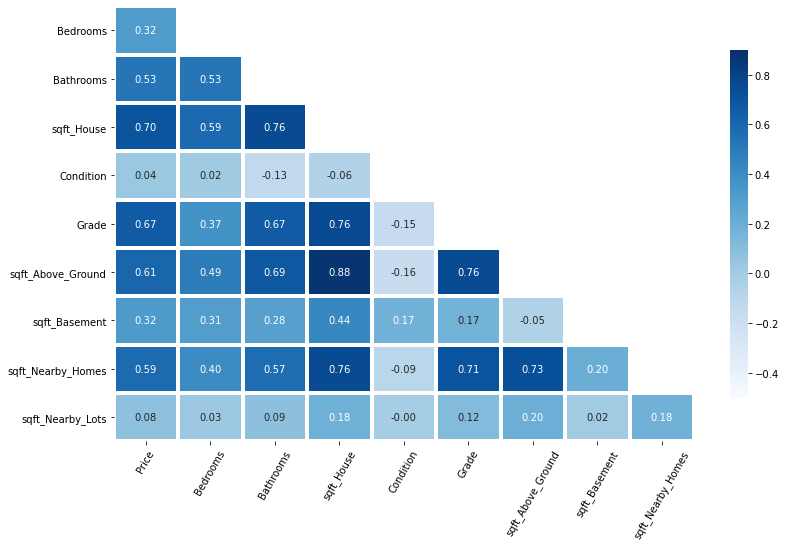

In [14]:
correlation_significant_features_df = data_z[significant_features]
correlation_significant_features_df.insert(loc=0, column='Price', value=data_z['Price'])
correlation_significant_features = correlation_significant_features_df.corr()

# creates the figure and axis for the subplots

fig1, ax1 = plt.subplots(figsize=(13, 8))

# creates a mask to remove the mirrored half of heatmap

mask = np.triu(np.ones_like(correlation_significant_features, dtype=np.bool))

# adjusts mask and dataframe

mask_sig_adj = mask[1:, :-1]
correlation_sig_adj = correlation_significant_features.iloc[1:,:-1].copy()

# plots heatmap

sns.heatmap(correlation_sig_adj, mask=mask_sig_adj, annot=True, fmt='.2f', cmap='Blues', linewidths=3, vmin=-0.5, vmax=0.9, cbar_kws={"shrink": .8})

# ytick adjustment

plt.xticks(rotation=60)
plt.show()

### Lasso Regression

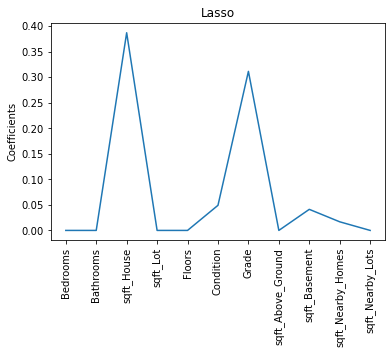

In [15]:
# performs lasso regression to determine most relevant features
features_ = data_z.drop('Price', axis=1).columns
lasso = Lasso(alpha=0.05)
lasso_coef = lasso.fit(features, target).coef_
plt.plot(range(len(features_)), lasso_coef)
plt.xticks(range(len(features_)), features_, rotation=90)
plt.ylabel('Coefficients')
plt.title('Lasso')
plt.show()

### Three Variable OLS Regression Model

In [16]:
#building an OLS model with the 3 most explanatory variables
_target_ = 'Price'
_significant_features_ = ['sqft_House','Grade','sqft_Basement']
_significant_predictors_ = '+'.join(_significant_features_)
formula = _target_ + '~' + _significant_predictors_
three_var_model = ols(formula=formula, data=data_).fit()
three_var_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8494.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:55:31   Log-Likelihood:            -2.9896e+05
No. Observations:               21596   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.565e+05   1.36e+04    -48.300      0.000   -6.83e+05    -6.3e+05
sqft_House      156.5049      3.254     48.102      0.000     150.128     162.882
Grade          1.108e+05   2325.619     47.637      0.000    1.06e+05    1.15e+05
sqft_Basement    78.0710      4.427     17.636      0.000      69.394      86.748
==============================================================================
Omnibus:                    17102.423   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1062486.894
Skew:                           3.332   Prob(JB):                         0.00
Kurtosis:                      36.710   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Final OLS model 

In [17]:
#building an OLS model with only Grade and SqFt.
_target_ = 'Price'
significant_features_ = ['sqft_House','Grade']
significant_predictors_ = '+'.join(significant_features_)
formula = _target_ + '~' + significant_predictors_
two_var_model = ols(formula=formula, data=data_).fit()
two_var_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                 1.241e+04
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:55:31   Log-Likelihood:            -2.9912e+05
No. Observations:               21596   AIC:                         5.982e+05
Df Residuals:                   21593   BIC:                         5.983e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.028e+05   1.33e+04    -45.185      0.000   -6.29e+05   -5.77e+05
sqft_House   184.1237      2.872     64.103      0.000     178.494     189.754
Grade       9.926e+04   2247.789     44.157      0.000    9.48e+04    1.04e+05
==============================================================================
Omnibus:                    16960.591   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1005805.049
Skew:                           3.304   Prob(JB):                         0.00
Kurtosis:                      35.774   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  Scatter Plots of Price vs. Grade & Square Footage

#### Original Data

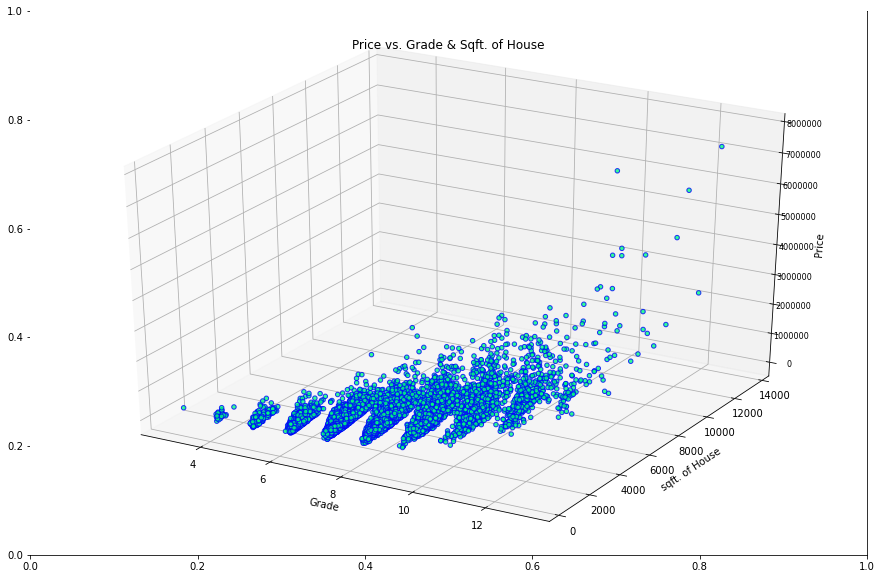

In [18]:
# 3D plot for the original data
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

x=data_['Grade']
y=data_['sqft_House']
z=data_['Price']

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x, y, z, c='springgreen', marker='o',linewidths=1, edgecolors='blue', alpha=0.8)
fig.set_size_inches(15,10)
plt.title('Price vs. Grade & Sqft. of House')
ax.set_xlabel('Grade')
ax.set_ylabel('sqft. of House')
ax.set_zlabel('Price')
ax.zaxis.set_tick_params(labelsize=8)

ax.ticklabel_format(axis='z', style='plain')

plt.show()

#### z-score Data 

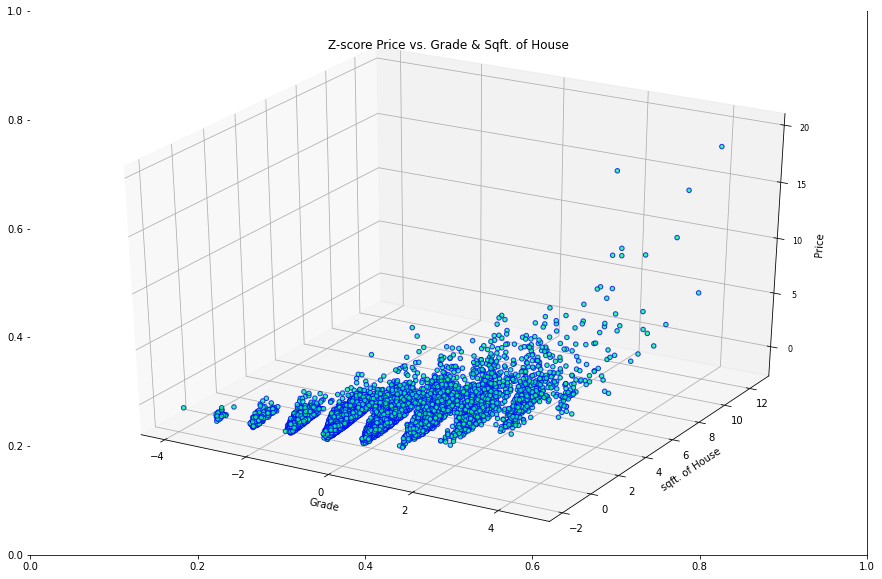

In [19]:
# 3D plot for the z-score data
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

x=data_z['Grade']
y=data_z['sqft_House']
z=data_z['Price']

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x, y, z, c='springgreen', marker='o',linewidths=1, edgecolors='blue', alpha=0.8)
fig.set_size_inches(15,10)
plt.title('Z-score Price vs. Grade & Sqft. of House')
ax.set_xlabel('Grade')
ax.set_ylabel('sqft. of House')
ax.set_zlabel('Price')
ax.zaxis.set_tick_params(labelsize=8)

ax.ticklabel_format(axis='z', style='plain')

plt.show()

#### Log Transformed Data 

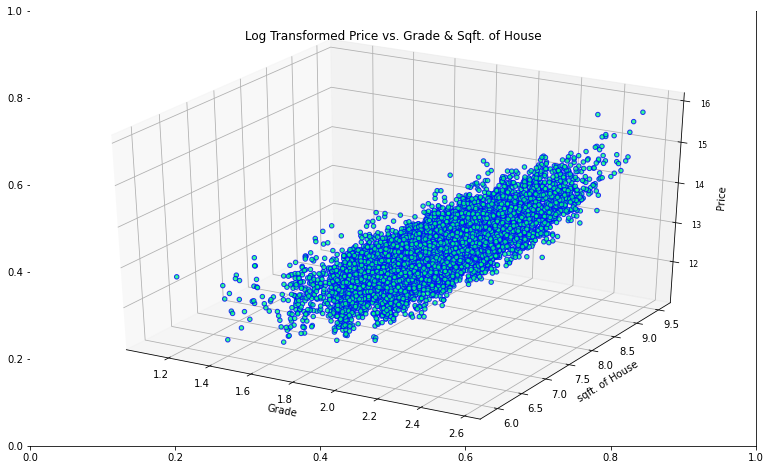

In [20]:
# 3D plot for the log transformed data
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

x=data_log['Grade']
y=data_log['sqft_House']
z=data_log['Price']

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x, y, z, c='springgreen', marker='o',linewidths=1, edgecolors='blue', alpha=0.8)
fig.set_size_inches(13,8)
plt.title('Log Transformed Price vs. Grade & Sqft. of House')
ax.set_xlabel('Grade')
ax.set_ylabel('sqft. of House')
ax.set_zlabel('Price')
ax.zaxis.set_tick_params(labelsize=8)

ax.ticklabel_format(axis='z', style='plain')

plt.show()

### Investigating Residuals 

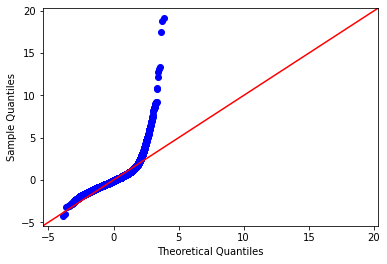

In [21]:
residplot = sm.graphics.qqplot(two_var_model.resid, dist=stats.norm, line='45', fit=True)

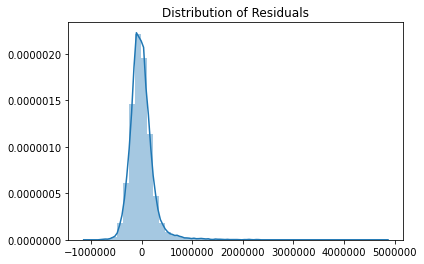

In [22]:
sns.distplot(two_var_model.resid)
plt.ticklabel_format(style='plain')
plt.title('Distribution of Residuals')
plt.show()

In [23]:
for i in range(90, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, data_['Price'].quantile(q=q)))

0.9 percentile: 887000.0
0.91 percentile: 919994.5
0.92 percentile: 950000.0
0.93 percentile: 997967.5
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0


In [24]:
# remove all houses above $1,000,000
subset = data_[data_['Price'] <= 1000000]
print('Percent removed:', (round((len(data_) - len(subset))/len(data_), 5)))
outcome = 'Price'
predictors = '+'.join(significant_features_)
formula = outcome + '~' + predictors
model_under_1m = ols(formula=formula, data=subset).fit()
model_under_1m.summary()

Percent removed: 0.06751


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     7936.
Date:                Wed, 28 Oct 2020   Prob (F-statistic):               0.00
Time:                        01:55:33   Log-Likelihood:            -2.6817e+05
No. Observations:               20138   AIC:                         5.363e+05
Df Residuals:                   20135   BIC:                         5.364e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.611e+05   8571.388    -30.458      0.000   -2.78e+05   -2.44e+05
sqft_House    88.1682      1.904     46.314      0.000      84.437      91.900
Grade       7.416e+04   1420.151     52.220      0.000    7.14e+04    7.69e+04
==============================================================================
Omnibus:                      879.678   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              998.133
Skew:                           0.534   Prob(JB):                    1.81e-217
Kurtosis:                       3.219   Cond. No.                     1.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

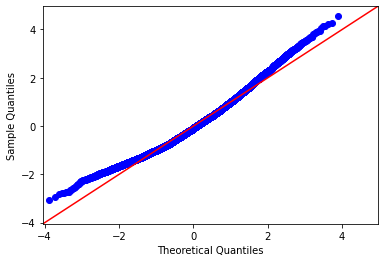

In [25]:
fig_drop_outliers = sm.graphics.qqplot(model_under_1m.resid, dist=stats.norm, line='45', fit=True)

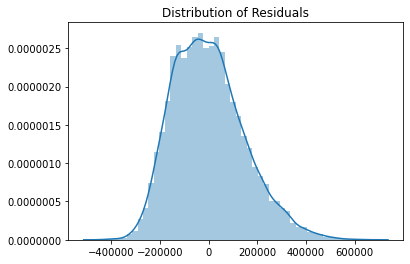

In [26]:
sns.distplot(model_under_1m.resid)
plt.ticklabel_format(style='plain')
plt.title('Distribution of Residuals')
plt.show()

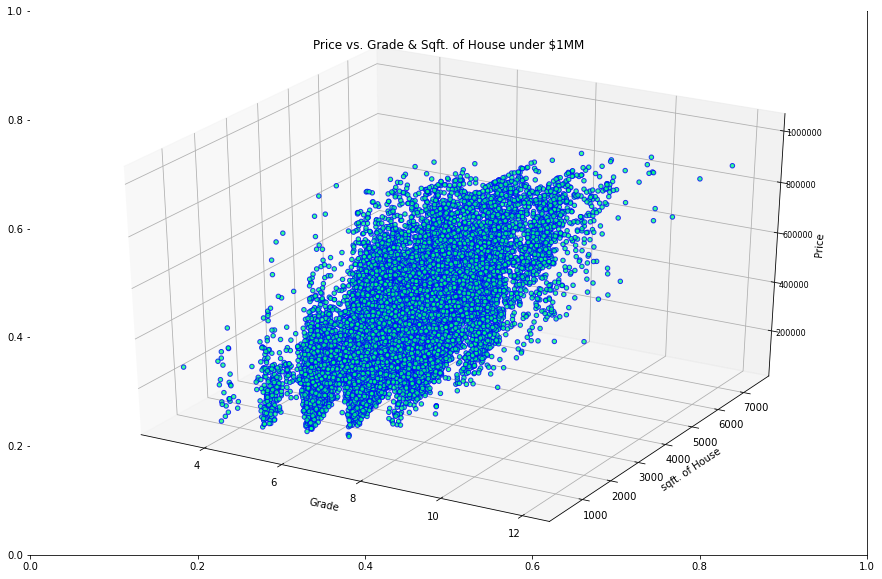

In [27]:
# 3D plot for the original data
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

x=subset['Grade']
y=subset['sqft_House']
z=subset['Price']

x = np.array(x)
y = np.array(y)
z = np.array(z)

ax.scatter(x, y, z, c='springgreen', marker='o',linewidths=1, edgecolors='blue', alpha=0.8)
fig.set_size_inches(15,10)
plt.title('Price vs. Grade & Sqft. of House under $1MM')
ax.set_xlabel('Grade')
ax.set_ylabel('sqft. of House')
ax.set_zlabel('Price')
ax.zaxis.set_tick_params(labelsize=8)

ax.ticklabel_format(axis='z', style='plain')

plt.show()

### Conclusion 

The final linear model has an r-squared of 0.535, which means it can only explain about 54% of the response variable variation. The features used to construct the final model has p-values less than 0.05 in the initial model, and were tested for multicollinearity using the litmus test of their variance inflation factors.

Their corresponding VIFs were: 

sqft_House: 5.787
Grade: 3.074
sqft_Basement: 1.424

Removing houses above $1MM makes the distribution of residuals much more normally distributed.
It brings skew down from 3.02 to 0.53 and kurtosis down from 35.77 to 3.2.

In [28]:
jupyter nbconvert --to markdown README.ipynb

SyntaxError: invalid syntax (<ipython-input-28-3c9a2e22f0f1>, line 1)